# Statistical Arbitrage
This is short notebook to download price data and plot the spread for bond instrument pairs.

In [3]:
# Import Packages
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from datetime import datetime, timedelta

In [4]:
# Method to download price data from yahoo finance
def download_prices(tickers, start_date, end_date):
    print(f'Downloading Price Data for {tickers}')
    prices = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
    return prices

# Method to plot price data
def plot_prices(prices, title):
    plt.figure(figsize=(10, 6))
    for ticker in prices.columns:
        plt.plot(prices.index, prices[ticker], label=ticker)

    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

def stationarity_test(series, significance_level=0.05):
    """
    Perform Augmented Dickey-Fuller test for stationarity.
    """
    result = adfuller(series, autolag='AIC')

    p_value = result[1]
    is_stationary = p_value < significance_level

    result_text = "*** STATIONARY ***" if is_stationary else "not stationary"
    print(f'Series is {result_text} (p-value: {p_value:.4f})')
    
    return is_stationary, p_value

# Method to compute the spread between two data series
def compute_spread(prices, spread_label, show_spread = True):
    
    # We compute the spread as series[1] - series[0]
    spread = prices.iloc[:, 1] - prices.iloc[:, 0]
    
    # Compute Average Spread and Perform Stationarity Test
    avg_spread = spread.mean()
    print(f'Average {spread_label}: {avg_spread:.2f}')
    stationarity_test(spread)
    
    # Plot Spread, if requested
    if (show_spread == True):
        plt.figure(figsize=(10, 4))
        plt.plot(prices.index, spread, label=spread_label, color='red')

        plt.title(spread_label)
        plt.xlabel('Date')
        plt.ylabel('Spread')
        plt.axhline(y=avg_spread, color='black', linestyle='--', linewidth=1)  # Add a horizontal line for avg_spread
        plt.legend()
        plt.show()

# Method to compute and plot bond spreads
def compute_bond_spread(bond_prices, bond_tickers, label, start_date, end_date, show_spread=False, show_prices=False):
    compute_spread(bond_prices, f'{label} Spread', show_spread)
    if (show_prices == True):
        plot_prices(bond_prices, f'{label} Bond Prices')
    
print("Loaded Bond Data, Spread, Analysis and Charting Methods")

Loaded Bond Data, Spread, Analysis and Charting Methods


In [56]:
def us_treasury_spreads(start_date, end_date, show_spread=False):
    
    # US Treasury Spread Tickers and Chart Labels
    label1 = '5Y - 2Y'
    bond_tickers1 = {'^IRX', '^FVX'}
    bond_prices1 = download_prices(bond_tickers1, start_date, end_date)
    
    label2 = '10Y - 2Y'
    bond_tickers2 = {'^TNX', '^IRX'}
    bond_prices2 = download_prices(bond_tickers2, start_date, end_date)

    label3 = '10Y - 5Y'
    bond_tickers3 = {'^TNX', '^FVX'}
    bond_prices3 = download_prices(bond_tickers3, start_date, end_date)

    # Compute UST Spreads
    compute_bond_spread(bond_prices1, bond_tickers1, label1, start_date, end_date, show_spread)
    compute_bond_spread(bond_prices2, bond_tickers2, label2, start_date, end_date, show_spread)
    compute_bond_spread(bond_prices3, bond_tickers3, label3, start_date, end_date, show_spread)

In [82]:
# Method to compute US Treasury Spreads over a Range of Time Periods
def us_treasury_spreads_loop(show_spread=False):
    # Define the end date as today
    end_date = datetime.now().strftime('%Y-%m-%d')

    # Define the treasury spreads and their corresponding tickers
    spreads = [
        {'label': '5Y - 2Y', 'tickers': {'^IRX', '^FVX'}},
        {'label': '10Y - 2Y', 'tickers': {'^TNX', '^IRX'}},
        {'label': '10Y - 5Y', 'tickers': {'^TNX', '^FVX'}}
    ]

    # Iterate over different start dates
    for years in [1, 2, 3, 4, 5, 10]:
        print(f'\nTime Period: {years} Year(s)')
        print(50*'-')
        print()
        start_date = (datetime.now() - timedelta(days=years * 365)).strftime('%Y-%m-%d')

        for spread in spreads:
            bond_prices = download_prices(spread['tickers'], start_date, end_date)
            compute_bond_spread(bond_prices, spread['tickers'], spread['label'], start_date, end_date, show_spread)

In [83]:
# Get US Treasury Spreads Over a Range of Time Periods
# During each period we test if the data series is stationary or not
us_treasury_spreads_loop(show_spread=False)


Time Period: 1 Year(s)
--------------------------------------------------

[*********************100%%**********************]  2 of 2 completed
Average 5Y - 2Y Spread: 0.89
Series is not stationary (p-value: 0.1009)
[*********************100%%**********************]  2 of 2 completed
Average 10Y - 2Y Spread: -1.02
Series is not stationary (p-value: 0.1801)
[*********************100%%**********************]  2 of 2 completed
Average 10Y - 5Y Spread: -0.12
Series is not stationary (p-value: 0.1961)

Time Period: 2 Year(s)
--------------------------------------------------

[*********************100%%**********************]  2 of 2 completed
Average 5Y - 2Y Spread: -0.15
Series is not stationary (p-value: 0.7624)
[*********************100%%**********************]  2 of 2 completed
Average 10Y - 2Y Spread: 0.09
Series is not stationary (p-value: 0.7873)
[*********************100%%**********************]  2 of 2 completed
Average 10Y - 5Y Spread: -0.06
Series is *** STATIONARY *** (p-value

[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed
Average 5Y - 2Y Spread: 0.33
Series is not stationary (p-value: 0.1505)


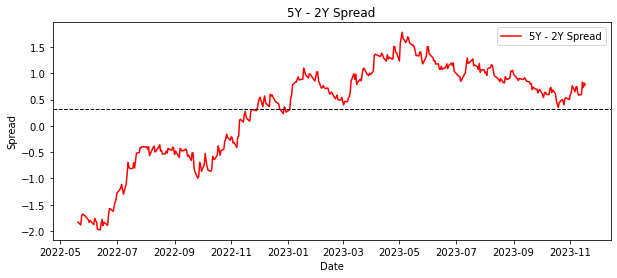

Average 10Y - 2Y Spread: -0.45
Series is not stationary (p-value: 0.0879)


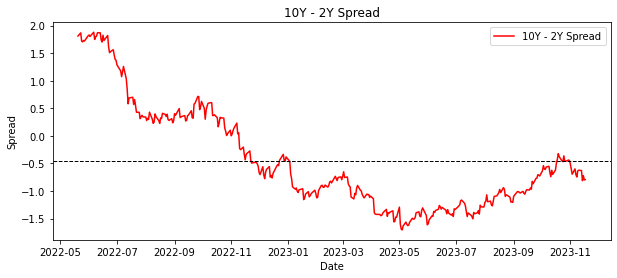

Average 10Y - 5Y Spread: -0.12
Series is *** STATIONARY *** (p-value: 0.0353)


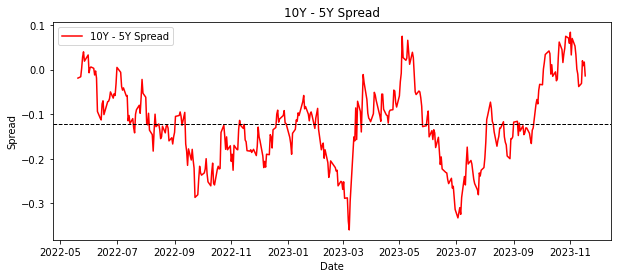

In [103]:
# Compute US Treasury Spreads: Over a Bespoke Time Period in Years
nYears = 1.5
end_date = datetime.now().strftime('%Y-%m-%d')
start_date = (datetime.now() - timedelta(days = nYears*365)).strftime('%Y-%m-%d')

us_treasury_spreads(start_date, end_date, show_spread=True)